# Diana Angélica Martínez Hernández
# Alberto Isaac Pico Lara
## Proyecto final de Minería de Datos

#### Librerías necesarias para exploración y tratamiento de datos

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
from sklearn import preprocessing
import seaborn as sns
import missingno as msno

#### Ruta a los archivos de audio de cada uno de los géneros (Prog, Salsa, Electro) y creación de listas con los nombres de los archivos en cada ruta, así como una lista que contenga todas las pistas

In [2]:
ruta_prog = '..\prog'
pistas_p = os.listdir(ruta_prog)
ruta_salsa = '..\salsa'
pistas_s = os.listdir(ruta_salsa)
ruta_electro = '..\electronica'
pistas_e = os.listdir(ruta_electro)
pistas_unif = pistas_p + pistas_s + pistas_e
generos = ['prog', 'salsa', 'electronica']

In [3]:
print('# de pistas prog: ', len(pistas_p))
print('# de pistas de Salsa: ', len(pistas_s))
print('# de pistas de electro: ', len(pistas_e))
print('# total de pistas:', len(pistas_unif))

# de pistas prog:  130
# de pistas de Salsa:  130
# de pistas de electro:  130
# total de pistas: 390


### Ejemplos de análisis de una pista aleatoria por cada género

In [4]:
a = randint(0, 129)

In [5]:
samples_p, sr_p = librosa.load(ruta_prog + '\\' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_s, sr_s = librosa.load(ruta_salsa + '\\' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_e, sr_e = librosa.load(ruta_electro + '\\' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)

d:\desarrollo\python\virtualpythonprincipal\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [6]:
print('Tamaño de muestreo (samples) prog: ', len(samples_p))
print('Tasa de muestreo (sampling rate) prog: ', sr_p)
print('Tamaño de muestreo (samples) salsa: ', len(samples_s))
print('Tasa de muestreo (sampling rate) salsa: ', sr_s)
print('Tamaño de muestreo (samples) electro: ', len(samples_e))
print('Tasa de muestreo (sampling rate) electro: ', sr_e)

Tamaño de muestreo (samples) prog:  2643840
Tasa de muestreo (sampling rate) prog:  44100
Tamaño de muestreo (samples) salsa:  2638080
Tasa de muestreo (sampling rate) salsa:  44100
Tamaño de muestreo (samples) electro:  2640384
Tasa de muestreo (sampling rate) electro:  44100


#### Pistas cargadas

In [7]:
print(pistas_p[a])

09 Underbite_02m_00s__03m_00s.mp3


In [8]:
Audio(ruta_prog + '\\' + pistas_p[a])

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

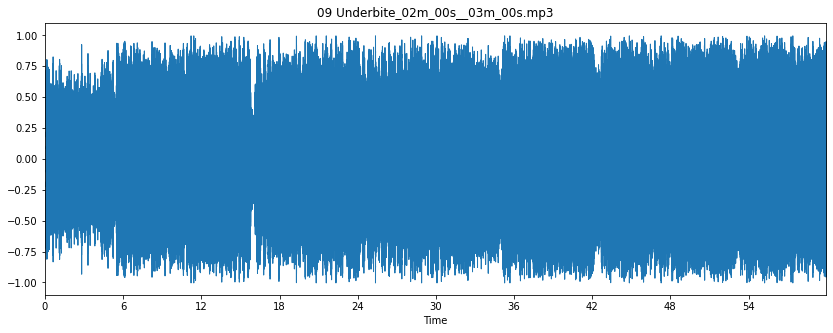

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_p, sr = sr_p)
plt.title(pistas_p[a])

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

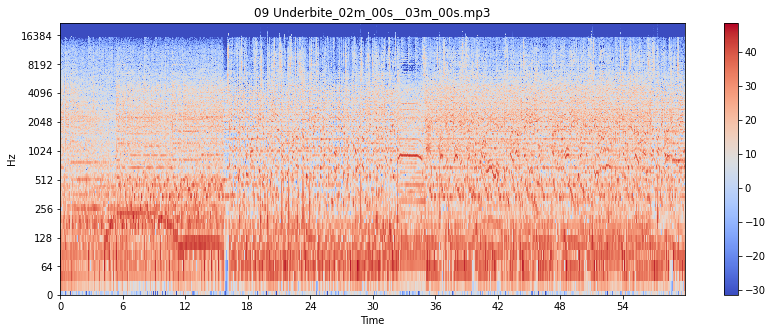

In [10]:
X = librosa.stft(samples_p)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_p[a])

In [11]:
print(pistas_s[a])

LAS CALAVERAS-LATIN BROTHERS_01m_00s__02m_00s.mp3


In [12]:
Audio(ruta_salsa + '\\' + pistas_s[a])

Text(0.5, 1.0, 'LAS CALAVERAS-LATIN BROTHERS_01m_00s__02m_00s.mp3')

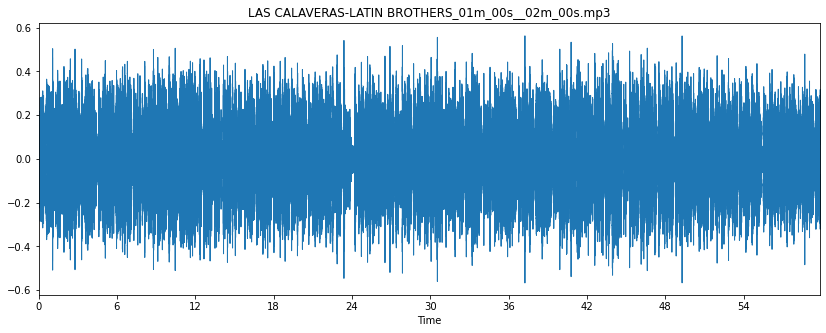

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_s, sr = sr_s)
plt.title(pistas_s[a])

Text(0.5, 1.0, 'LAS CALAVERAS-LATIN BROTHERS_01m_00s__02m_00s.mp3')

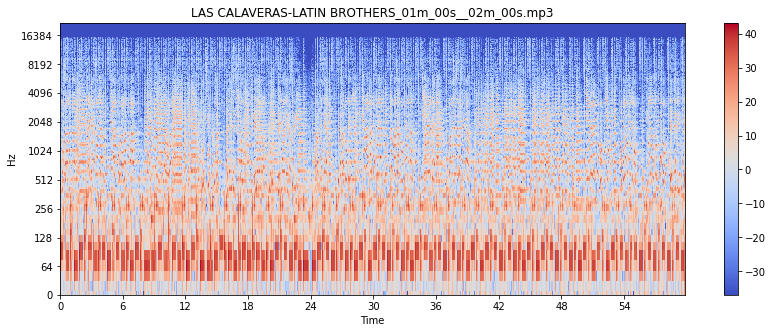

In [14]:
X = librosa.stft(samples_s)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_s, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_s[a])

In [15]:
print(pistas_e[a])

Rock The Party (Original Mix)_01m_00s__02m_00s.mp3


In [16]:
Audio(ruta_electro + '\\' + pistas_e[a])

Text(0.5, 1.0, 'Rock The Party (Original Mix)_01m_00s__02m_00s.mp3')

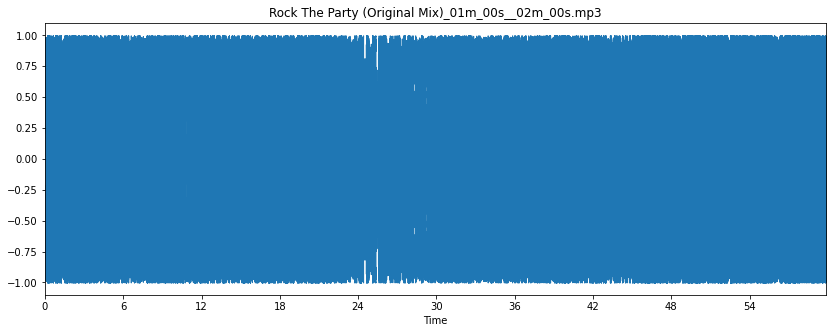

In [17]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_e, sr = sr_e)
plt.title(pistas_e[a])

Text(0.5, 1.0, 'Rock The Party (Original Mix)_01m_00s__02m_00s.mp3')

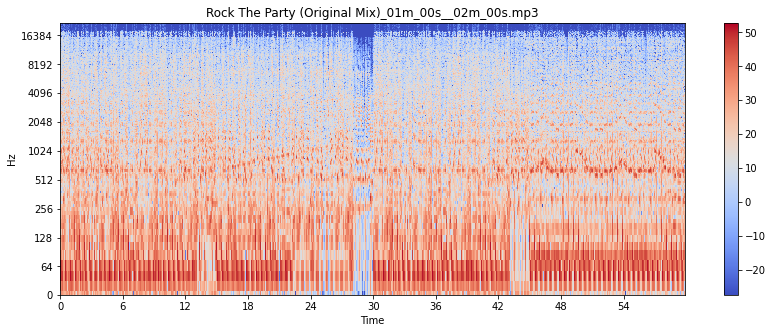

In [18]:
X = librosa.stft(samples_e)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_e, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_e[a])

### Selección de características ejemplo
Algunas de las caracerísticas que se pueden extraer del audio son las siguientes:
#### Característica espectrales del audio
- Zero crossing rate: tasa de cambios de signo a través de una señal
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio
- Spectrall Roll off: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico.
- Spectral Bandwidth, ancho de banda espectral de la señal de audio.
- Mel Frequency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana 
- Chroma frequencies: Representación de los 12 semitonos que existen en la octava musical
#### Características rítmicas
- Tempograma: Estimación de los BPM de cada pista

En las siguientes líneas se muestra con una pista ejemplo la extracción y visualización de una pista, más adelante se les hará la extracción a las 390 pistas que forman parte del conjunto de datos elegido.

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

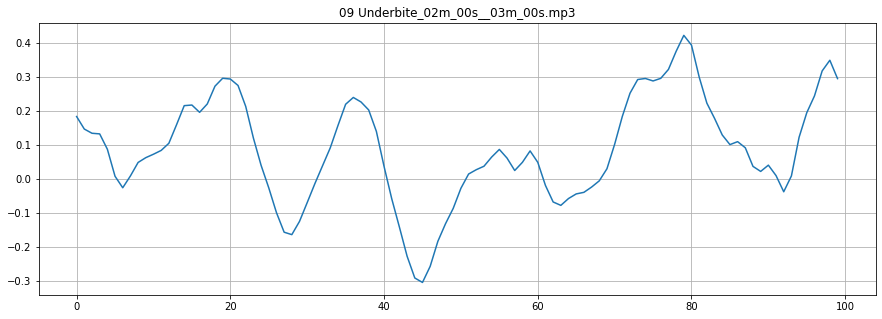

In [19]:
#Zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(samples_p[n0:n1])
plt.grid()
plt.title(pistas_p[a])

A simple vista se aprecian 3 cruces con el 0, se verifica con la lbrería librosa

In [20]:
zero_crossings= librosa.zero_crossings(samples_p[n0:n1], pad=False)
print(np.mean(zero_crossings))
print(sum(zero_crossings))

samples_p

0.1
10


array([ 0.        ,  0.        ,  0.        , ..., -0.40953064,
       -0.42288208, -0.45996094], dtype=float32)

In [21]:
#spectral centroid, calcula el crentoide espectral para cada cuadro de la señal
spectral_centroids = librosa.feature.spectral_centroid(samples_p, sr=sr_p)[0]
spectral_centroids.shape

(5164,)

In [22]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [23]:
def normalize(x, axis = 0):
    return preprocessing.minmax_scale(x, axis = axis)

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

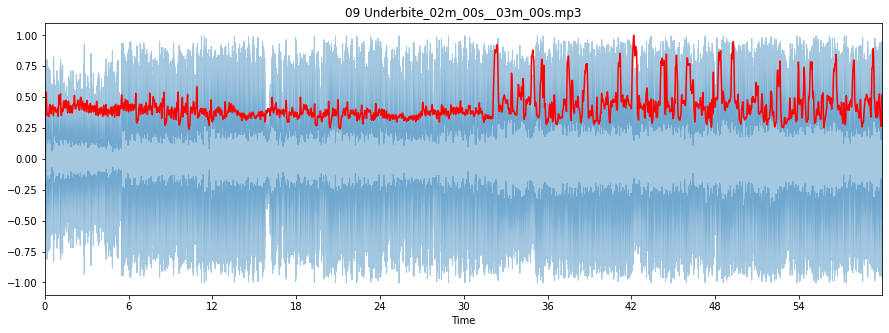

In [24]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr=sr_p, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title(pistas_p[a])

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

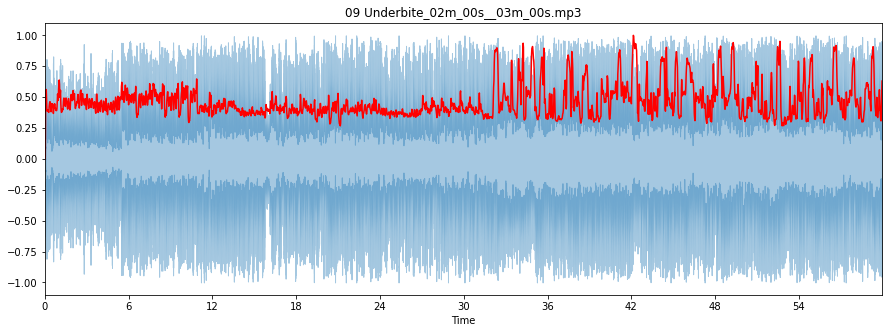

In [25]:
#spectral rolloff
spr = librosa.feature.spectral_rolloff(samples_p+0.01, sr = sr_p)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr = sr_p, alpha = 0.4)
plt.plot(t, normalize(spr), color = 'r')
plt.title(pistas_p[a])

In [26]:
#MFCC
mfccs = librosa.feature.mfcc(samples_p, sr = sr_p)
mfccs.shape

(20, 5164)

In [27]:
#20 MFCC en 5,171 cuadros

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

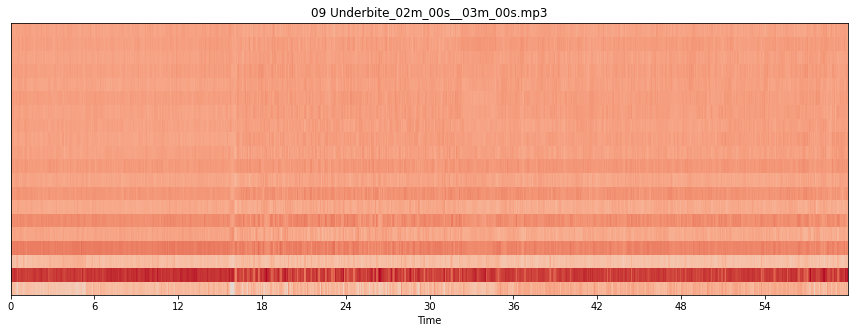

In [28]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr_p, x_axis='time')
plt.title(pistas_p[a])

Text(0.5, 1.0, '09 Underbite_02m_00s__03m_00s.mp3')

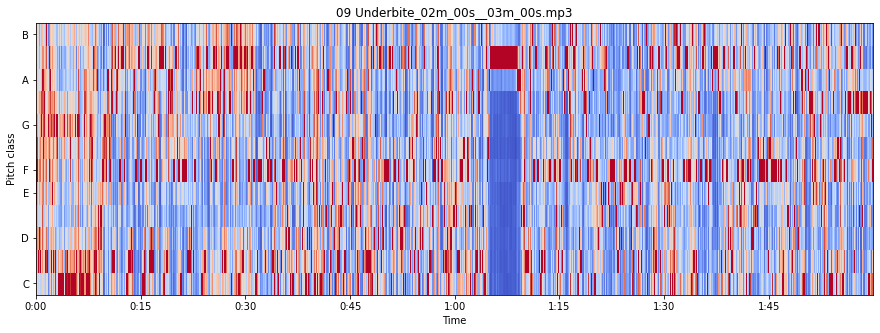

In [29]:
#Chroma frequencies: representación de la escala cromática en 12 semitonos
salto = 512
cromatica = librosa.feature.chroma_stft(samples_p, sr=sr_p, hop_length=salto)
plt.figure(figsize=(15, 5))
librosa.display.specshow(cromatica, x_axis='time', y_axis='chroma', hop_length=salto, cmap='coolwarm')
plt.title(pistas_p[a])

In [30]:
%%time
#Temmpograma
hop_length = 512
env = librosa.onset.onset_strength(y = samples_p, sr = sr_p, hop_length = hop_length)
tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr_p, hop_length = hop_length)

auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
auto_c = librosa.util.normalize(auto_c)

#mostrar los "beats"
tempo = librosa.beat.tempo(onset_envelope = env, sr = sr_p, hop_length = hop_length)[0]
print(tempo)
print(auto_c.shape)
print(np.mean(auto_c))

117.45383522727273
(384,)
0.7405524214584753
Wall time: 1.74 s


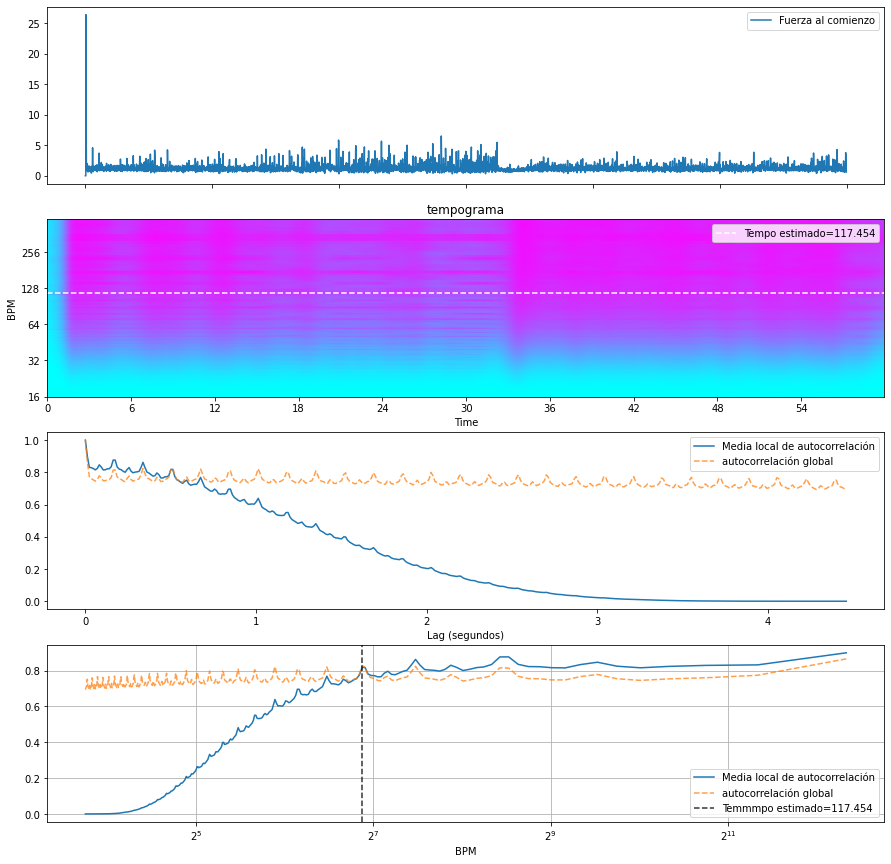

In [31]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
tiempos = librosa.times_like(env, sr=sr_p, hop_length=hop_length)
ax[0].plot(tiempos, env, label='Fuerza al comienzo')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='tempograma')
x = np.linspace(0, tempograma.shape[0] * float(hop_length) / sr_p,num=tempograma.shape[0])
ax[2].plot(x, np.mean(tempograma, axis=1), label='Media local de autocorrelación')
ax[2].plot(x, auto_c, '--', alpha=0.75, label='autocorrelación global')
ax[2].set(xlabel='Lag (segundos)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempograma.shape[0], hop_length=hop_length, sr=sr_p)
ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación', basex=2)
ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Temmmpo estimado={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

Text(0.5, 1.0, 'tempograma de 09 Underbite_02m_00s__03m_00s.mp3')

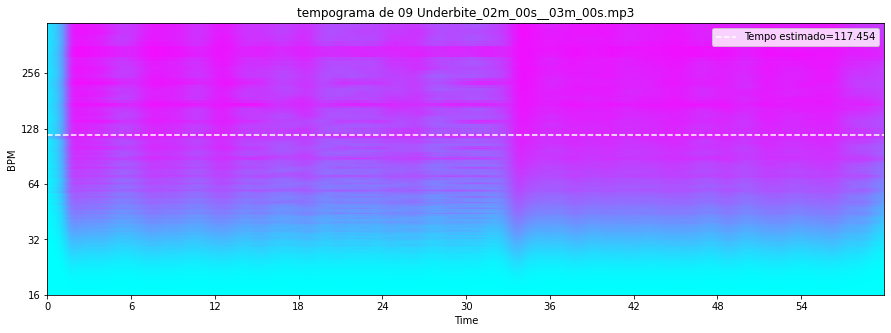

In [32]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
plt.legend(loc='upper right')
plt.title('tempograma de ' + pistas_p[a])

## Extraer expectrograma de cada canción

In [33]:
import pathlib

## Extraer características de cada canción

### Importación de de dataset generado

In [34]:
pd.set_option('display.max_columns',500)

In [35]:
a = '..\\data_set\\datos_musica.csv'

In [36]:
df = pd.read_csv(a, sep = ',', encoding = 'utf8')

In [37]:
df.head()

Unnamed: 0                                      archivo  zero_cr  \
0           0          01-TheMountain_02m_00s__03m_00s.mp3        6   
1           1  01ANightmareToRemember_02m_00s__03m_00s.mp3        4   
2           2              01AcidRain_02m_00s__03m_00s.mp3        5   
3           3          01BalrogBoogie_02m_00s__03m_00s.mp3        2   
4           4            01C'estlaVie_02m_00s__03m_00s.mp3        5   

   spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
0        2358.978044  2552.823890  4793.526802  0.470420 -163.372833   
1        3100.689109  3256.578868  6469.363992  0.596201  -48.062439   
2        3198.378355  3543.702522  6808.570540  0.546079  -58.244419   
3        2942.011868  3163.903990  6050.917527  0.433330  -91.082634   
4        3123.743239  3337.527859  6499.844646  0.535730  -34.448353   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  165.717529 -50.697205  13.083968  -0.032861  16.523687 -10.634155   
1  135.743393 -53.932007  63.562389  -6.626508  33.995968  -5.462245   
2  134.549545 -35.384872  52.873055  -5.400178  27.031818 -12.117587   
3  134.391296 -46.598930  44.523190  -2.545116  30.069979  -9.316360   
4  137.779984 -48.767544  63.001434 -11.798602  31.900543 -13.216450   

      mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13   mfcc_14  \
0  13.878497 -0.156555   4.318977  1.155136  3.123753  3.154028  3.419914   
1  21.089064  0.379193  13.363898 -0.915789  8.659492  1.639240  5.244628   
2  20.233650 -8.962458  10.447237 -4.707659  7.385719 -0.928300  4.593798   
3  17.695271 -0.801928   9.089577 -1.713330  8.924645  4.266488  2.395693   
4  19.975677 -6.714272  13.966826  0.649572  8.866032  1.035663  3.280222   

    mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  1.201207 -3.672799  1.497480  0.186496  0.511725 -5.180268  123.046875   
1  1.330808 -2.682353  0.532447 -1.862646  1.804187 -5.636509  109.956782   
2  1.471745  0.739590  0.728077 -4.671610  3.458641 -1.755218  143.554688   
3  1.147897  1.289821 -0.101062 -4.962541  3.051191 -2.858684   90.666118   
4  3.242964 -4.131340  1.912559 -6.067165  2.728408 -6.114751  120.185320   

     auto_c genero  
0  0.772140   prog  
1  0.628546   prog  
2  0.541958   prog  
3  0.541528   prog  
4  0.746078   prog

In [38]:
df.tail()

Unnamed: 0                                            archivo  zero_cr  \
385         385             WhenLoveTakesOver_01m_00s__02m_00s.mp3        6   
386         386  WhenTheFunkDrops(OriginalMix)_01m_00s__02m_00s...       15   
387         387                     Wintermix_01m_00s__02m_00s.mp3       19   
388         388                           Yee_01m_00s__02m_00s.mp3        0   
389         389                     YouMakeMe_01m_00s__02m_00s.mp3        7   

     spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
385        2575.123693  3005.389688  5564.092052  0.502320 -188.561890   
386        3718.115177  3493.782363  7626.795035  0.567823  -58.652626   
387        3864.484272  3947.200355  8519.525400  0.480503  -58.399002   
388        3332.281145  3467.253378  7298.074751  0.431944 -105.453407   
389        3591.624189  3709.409154  7548.133606  0.477659   -1.158877   

         mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
385  145.575531 -41.501461  47.843094 -11.712511  28.348310  -7.600820   
386  105.322052 -53.181622  43.308205 -22.160574  26.726955 -12.496088   
387  118.087608 -31.061525  51.545441 -24.027578  36.409058 -21.325958   
388  114.252968 -18.881662  36.844822 -18.484241  33.493614  -6.559953   
389  123.738770 -36.778862  40.367935 -19.889458  27.192369 -11.229925   

        mfcc_8     mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13   mfcc_14  \
385  13.613605   2.732146   2.947855  3.605409  6.848191  2.274838 -2.674485   
386  22.249159  -1.509698   8.357769 -4.032179  5.886038  2.767959  2.678487   
387  20.040140 -15.393820   9.397675 -6.469026  4.237088 -3.188266  0.903239   
388  18.577913  -5.552446   9.160286 -7.346992 -3.262074 -8.601421 -8.937236   
389  18.227455  -4.435206  13.120482 -1.195981  6.046183  0.015581 -0.324959   

      mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
385  5.352834 -0.206322  3.039914 -2.498269  2.183645 -1.435693  129.199219   
386  2.477016 -1.815939  5.377456 -3.577778  7.179162 -2.833043  129.199219   
387  3.566648 -0.357372  5.836795 -2.829212  2.148330 -6.471159  129.199219   
388 -4.173946 -4.352620  5.287313 -0.805680  5.677492 -4.592224  129.199219   
389  0.980846 -4.326663  4.134473 -4.238715  6.130796 -1.494782  129.199219   

       auto_c       genero  
385  0.572574  electronica  
386  0.389928  electronica  
387  0.530109  electronica  
388  0.467498  electronica  
389  0.664809  electronica

In [39]:
var = list(df.columns)

In [40]:
var

['Unnamed: 0',
 'archivo',
 'zero_cr',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c',
 'genero']

In [41]:
del(df['Unnamed: 0'])

### Exploración

In [42]:
df.head()

archivo  zero_cr  spectral_centroid  \
0          01-TheMountain_02m_00s__03m_00s.mp3        6        2358.978044   
1  01ANightmareToRemember_02m_00s__03m_00s.mp3        4        3100.689109   
2              01AcidRain_02m_00s__03m_00s.mp3        5        3198.378355   
3          01BalrogBoogie_02m_00s__03m_00s.mp3        2        2942.011868   
4            01C'estlaVie_02m_00s__03m_00s.mp3        5        3123.743239   

   spectral_bw  spectral_rf     croma      mfcc_1      mfcc_2     mfcc_3  \
0  2552.823890  4793.526802  0.470420 -163.372833  165.717529 -50.697205   
1  3256.578868  6469.363992  0.596201  -48.062439  135.743393 -53.932007   
2  3543.702522  6808.570540  0.546079  -58.244419  134.549545 -35.384872   
3  3163.903990  6050.917527  0.433330  -91.082634  134.391296 -46.598930   
4  3337.527859  6499.844646  0.535730  -34.448353  137.779984 -48.767544   

      mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8    mfcc_9    mfcc_10  \
0  13.083968  -0.032861  16.523687 -10.634155  13.878497 -0.156555   4.318977   
1  63.562389  -6.626508  33.995968  -5.462245  21.089064  0.379193  13.363898   
2  52.873055  -5.400178  27.031818 -12.117587  20.233650 -8.962458  10.447237   
3  44.523190  -2.545116  30.069979  -9.316360  17.695271 -0.801928   9.089577   
4  63.001434 -11.798602  31.900543 -13.216450  19.975677 -6.714272  13.966826   

    mfcc_11   mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17  \
0  1.155136  3.123753  3.154028  3.419914  1.201207 -3.672799  1.497480   
1 -0.915789  8.659492  1.639240  5.244628  1.330808 -2.682353  0.532447   
2 -4.707659  7.385719 -0.928300  4.593798  1.471745  0.739590  0.728077   
3 -1.713330  8.924645  4.266488  2.395693  1.147897  1.289821 -0.101062   
4  0.649572  8.866032  1.035663  3.280222  3.242964 -4.131340  1.912559   

    mfcc_18   mfcc_19   mfcc_20         BPM    auto_c genero  
0  0.186496  0.511725 -5.180268  123.046875  0.772140   prog  
1 -1.862646  1.804187 -5.636509  109.956782  0.628546   prog  
2 -4.671610  3.458641 -1.755218  143.554688  0.541958   prog  
3 -4.962541  3.051191 -2.858684   90.666118  0.541528   prog  
4 -6.067165  2.728408 -6.114751  120.185320  0.746078   prog

In [43]:
df.shape

(390, 29)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   archivo            390 non-null    object 
 1   zero_cr            390 non-null    int64  
 2   spectral_centroid  390 non-null    float64
 3   spectral_bw        390 non-null    float64
 4   spectral_rf        390 non-null    float64
 5   croma              390 non-null    float64
 6   mfcc_1             390 non-null    float64
 7   mfcc_2             390 non-null    float64
 8   mfcc_3             390 non-null    float64
 9   mfcc_4             390 non-null    float64
 10  mfcc_5             390 non-null    float64
 11  mfcc_6             390 non-null    float64
 12  mfcc_7             390 non-null    float64
 13  mfcc_8             390 non-null    float64
 14  mfcc_9             390 non-null    float64
 15  mfcc_10            390 non-null    float64
 16  mfcc_11            390 non

In [45]:
df.isnull().any().any()

False

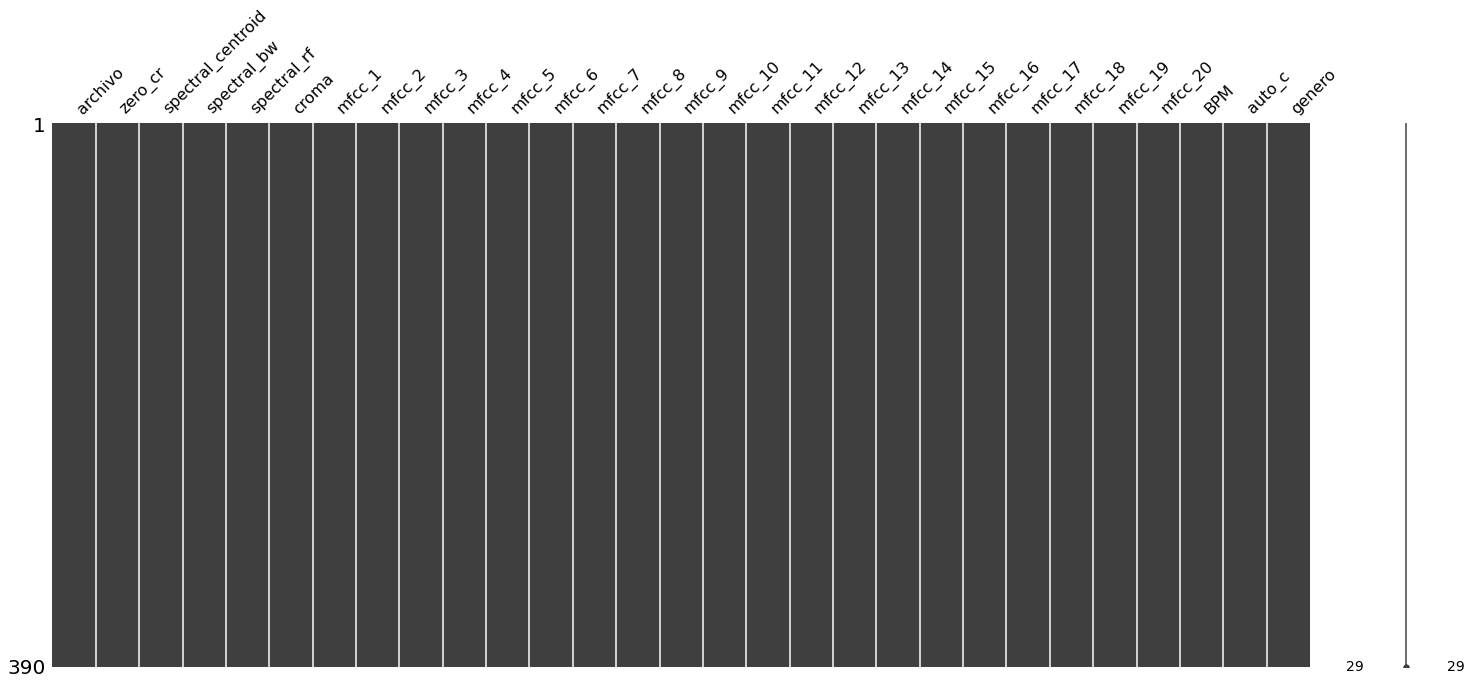

In [46]:
msno.matrix(df)

In [47]:
df.groupby('genero').mean()

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma  \
genero                                                                         
electronica  7.715385        3664.769823  3719.675979  7857.998810  0.532508   
prog         4.892308        2633.703679  2944.731812  5422.004875  0.520611   
salsa        7.492308        2866.901424  3039.036636  5855.439288  0.419100   

                 mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
genero                                                                 
electronica  -65.689816  116.190062 -37.717804  45.229312 -21.328018   
prog        -121.510305  147.896507 -41.057114  46.850062   0.305706   
salsa       -204.440593  140.781212 -40.942452  49.471140 -11.883951   

                mfcc_6     mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11  \
genero                                                                        
electronica  31.227044 -13.062522  19.865181 -6.606800  11.919786 -2.089726   
prog         26.756867  -6.182665  15.559259 -1.505437   9.135088  0.658689   
salsa        22.663284 -11.767072  11.368040 -3.840248   1.848151 -1.951899   

              mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17  \
genero                                                                    
electronica  6.901863  2.001522  2.897985  3.759977 -0.840888  4.367829   
prog         4.925011  1.455034  1.789769  1.790361 -1.988850 -0.077769   
salsa        3.850634 -0.208070 -2.329010  2.166250 -3.473790  0.526125   

              mfcc_18   mfcc_19   mfcc_20         BPM    auto_c  
genero                                                           
electronica -2.061035  5.707278 -2.616686  127.834031  0.534869  
prog        -2.959955  1.395956 -4.444564  123.038354  0.622049  
salsa       -3.216435  1.328346 -5.358968  116.143151  0.468924

In [48]:
df_prog = df[df['genero'] == 'prog']
df_salsa = df[df['genero'] == 'salsa']
df_electro = df[df['genero'] == 'electronica']

<ipython-input-49-26f5e1ab8b7a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_prog.hist(ax = ax)


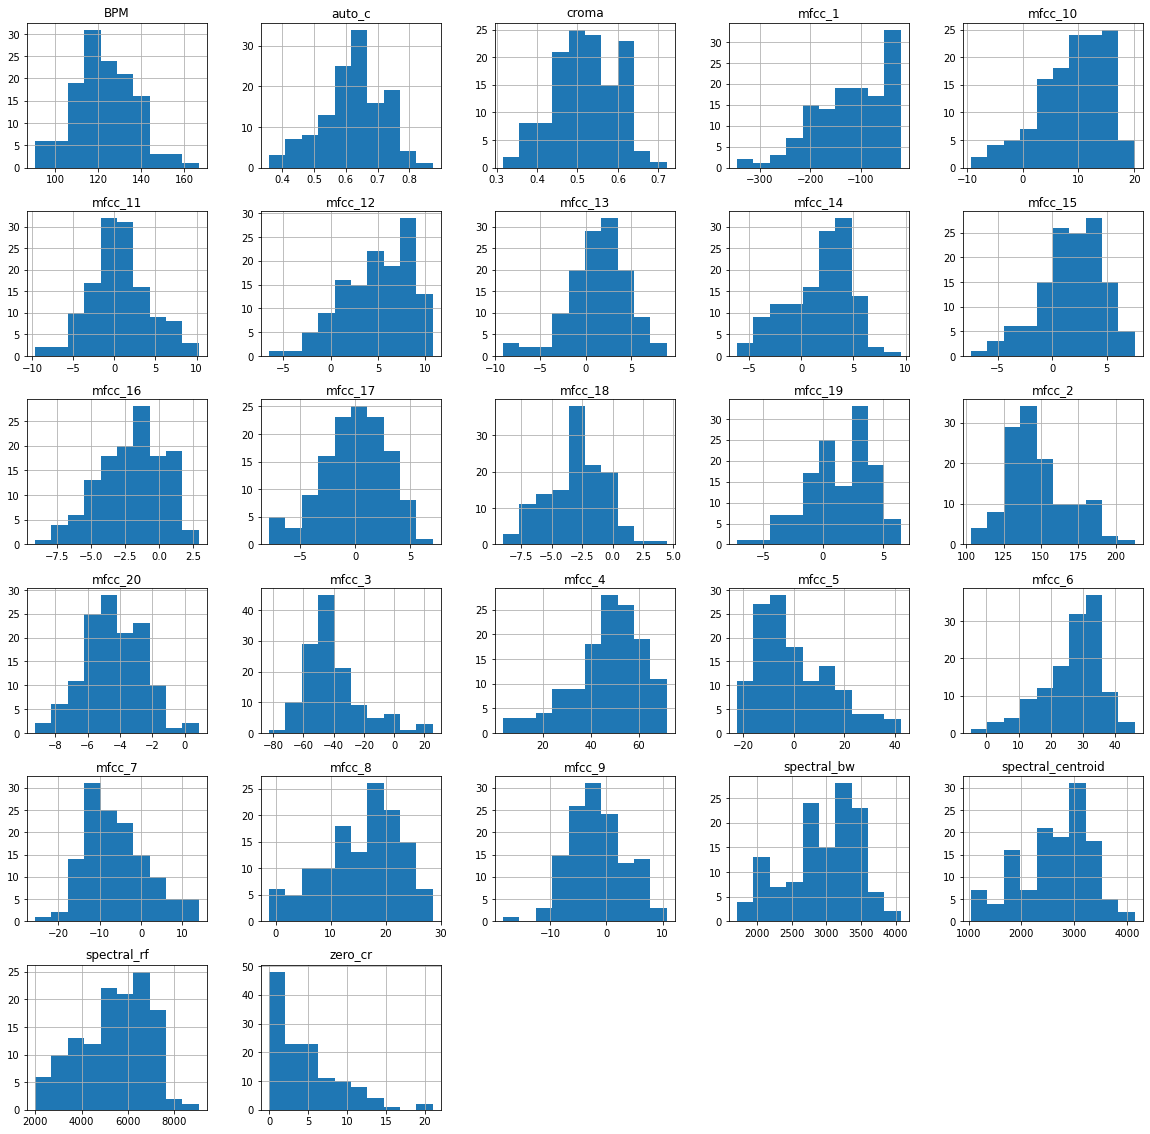

In [49]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_prog.hist(ax = ax)
plt.show()

<ipython-input-50-e0c31872f431>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_salsa.hist(ax = ax)


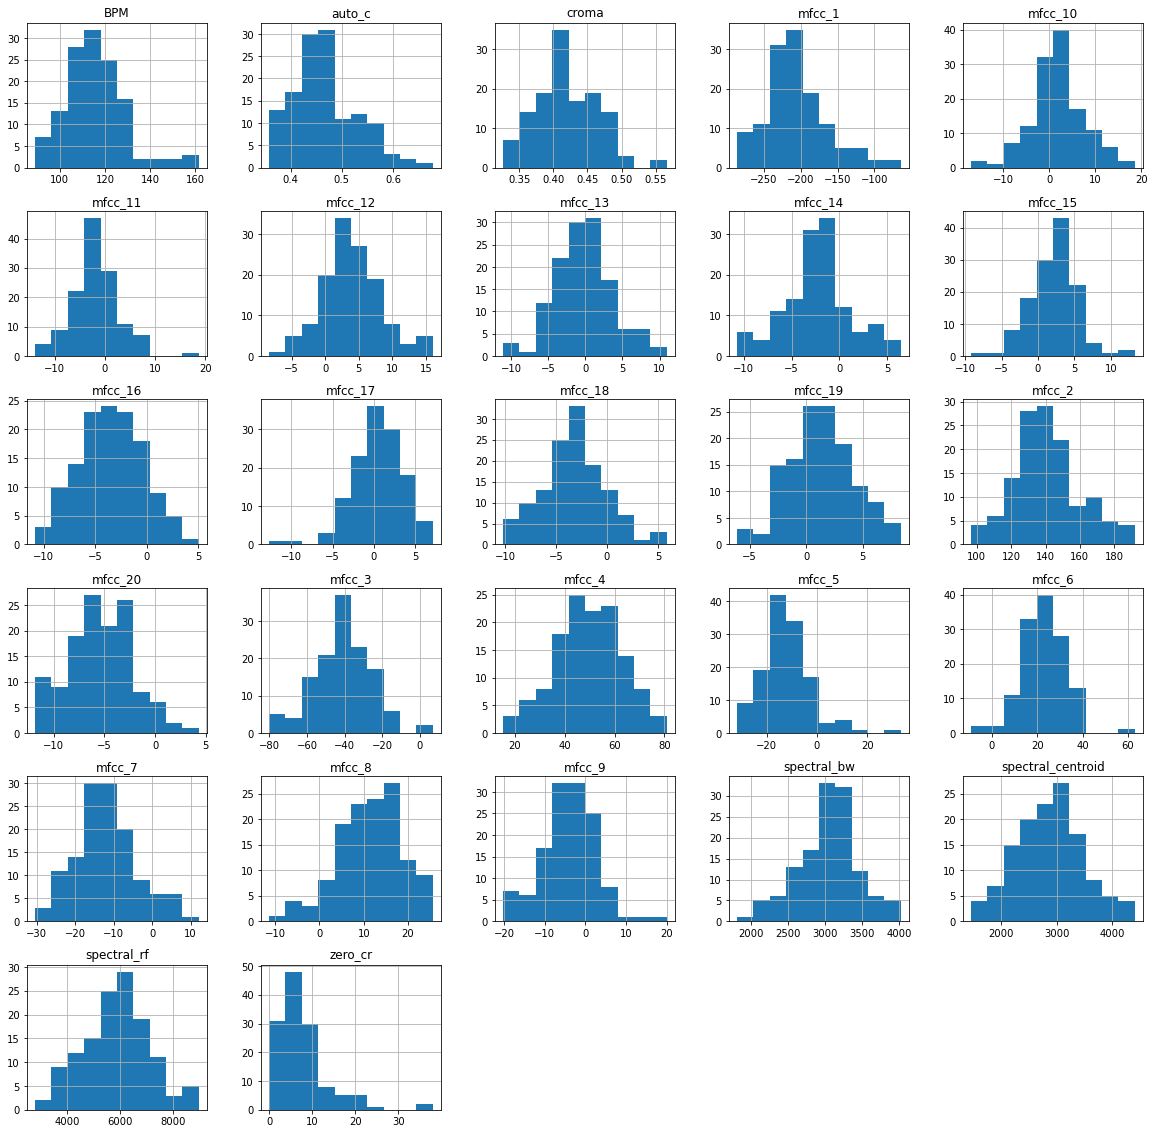

In [50]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_salsa.hist(ax = ax)
plt.show()

<ipython-input-51-beba6172af1c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_electro.hist(ax = ax)


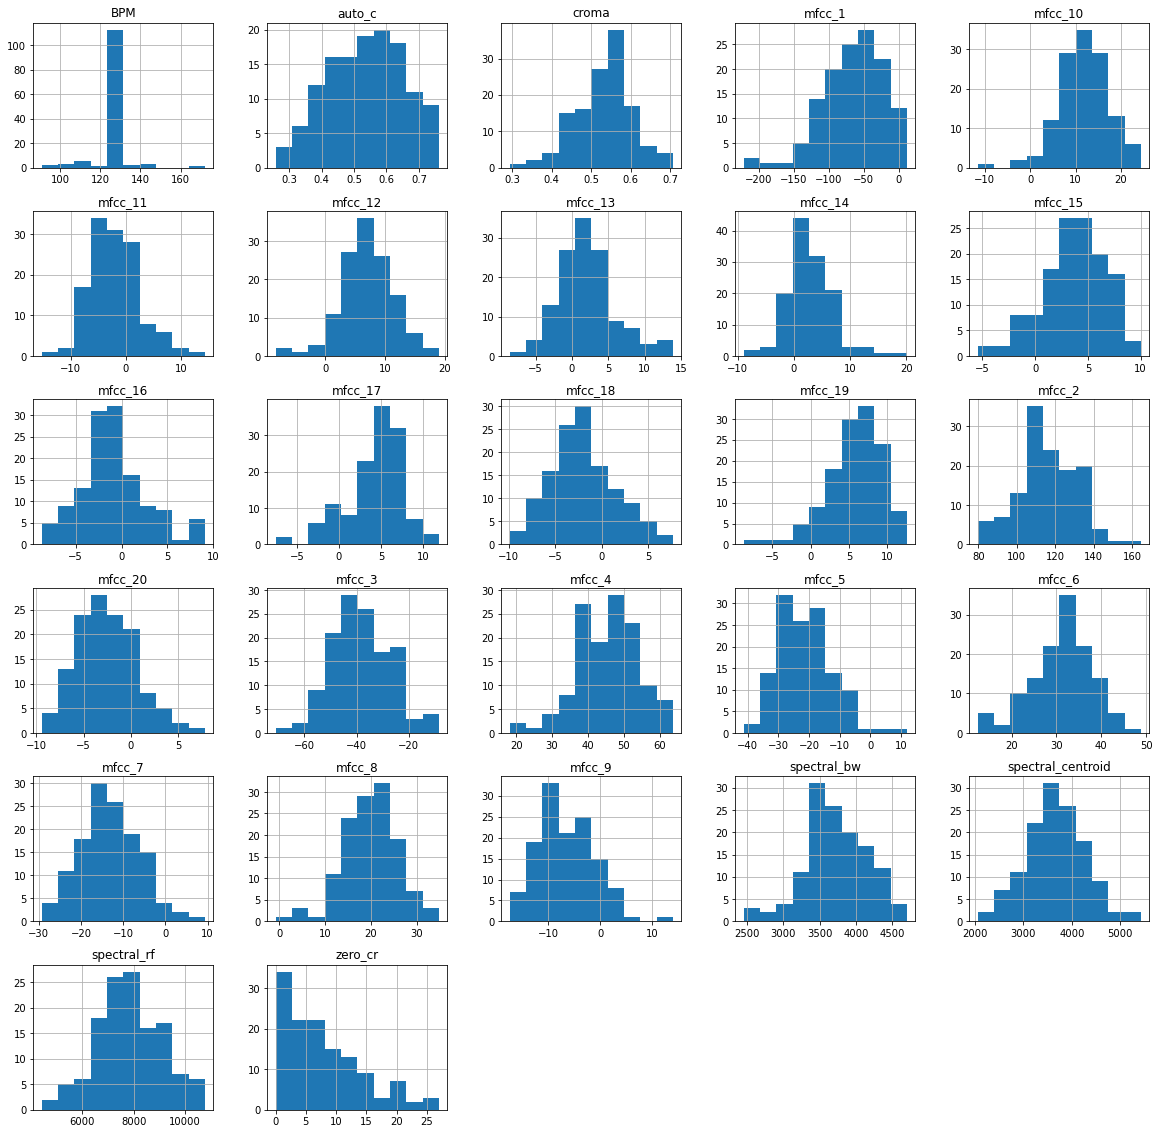

In [51]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_electro.hist(ax = ax)
plt.show()

<ipython-input-52-3d4109f8dcee>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


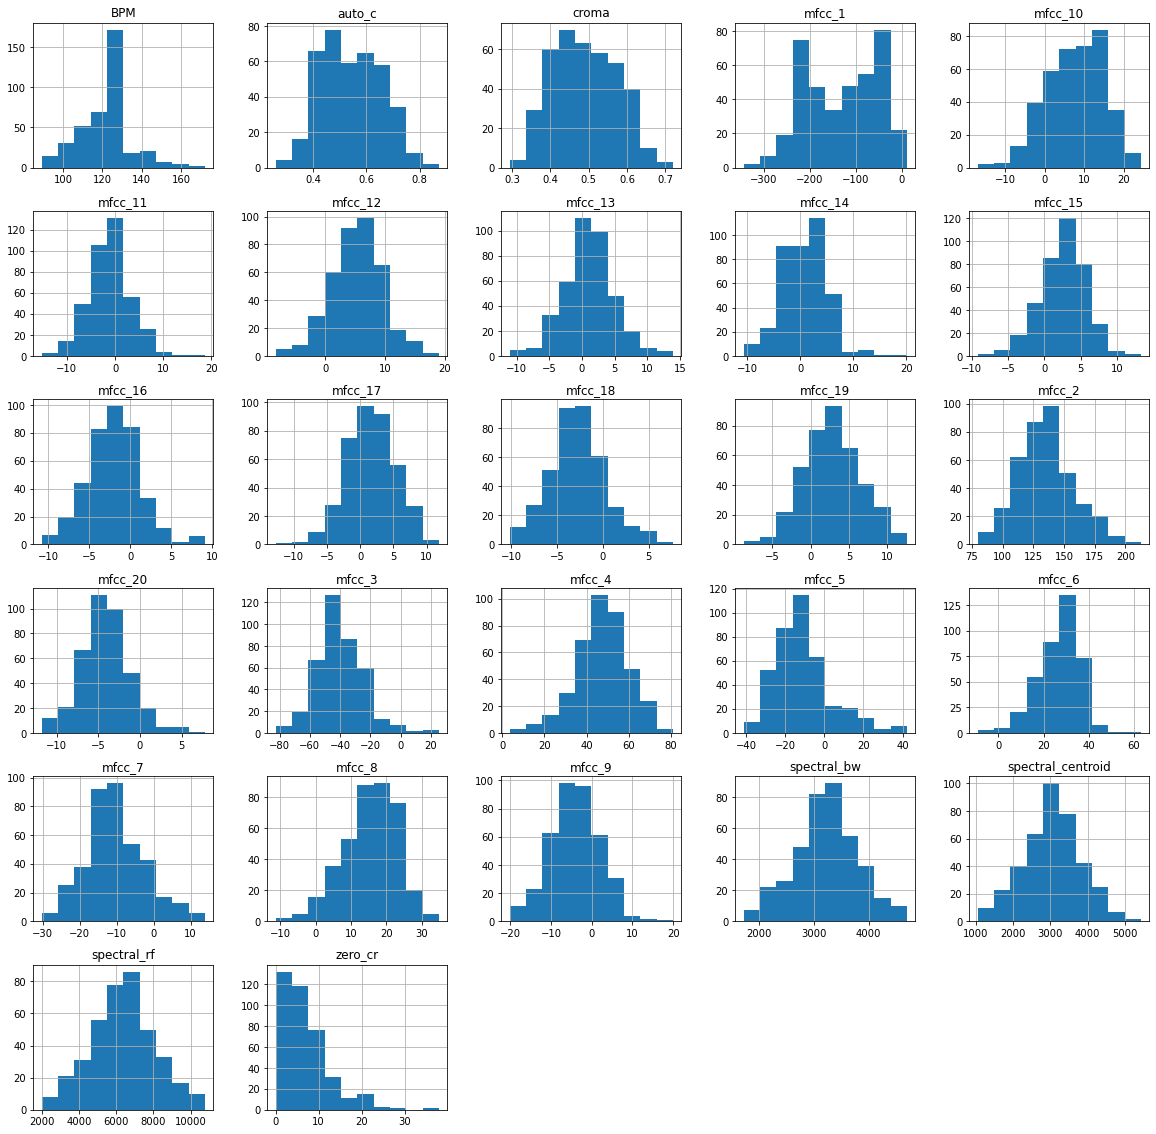

In [52]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

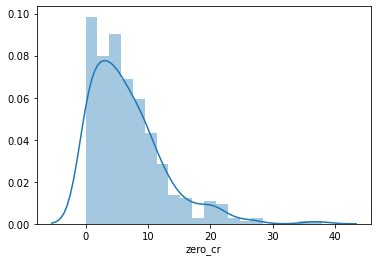

In [53]:
sns.distplot(df['zero_cr'])

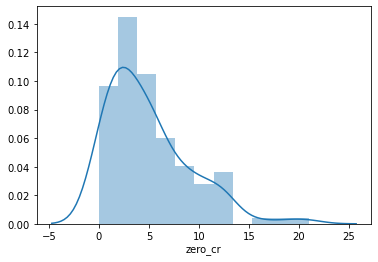

In [54]:
sns.distplot(df_prog['zero_cr'])

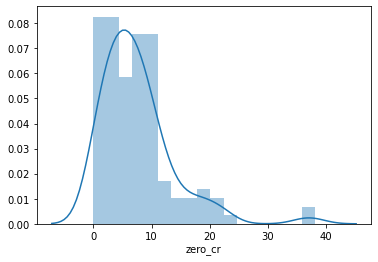

In [55]:
sns.distplot(df_salsa['zero_cr'])

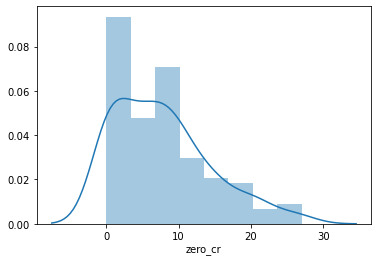

In [56]:
sns.distplot(df_electro['zero_cr'])

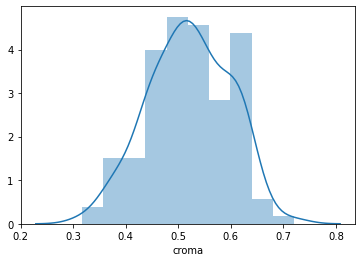

In [57]:
sns.distplot(df_prog['croma'])

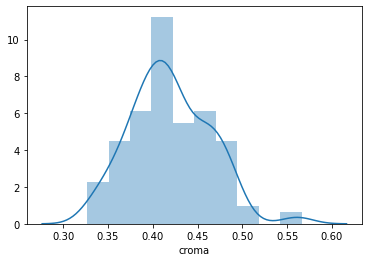

In [58]:
sns.distplot(df_salsa['croma'])

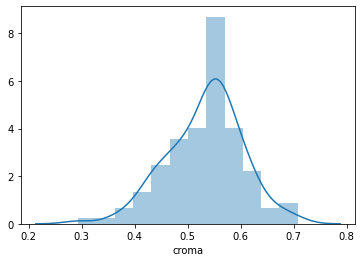

In [59]:
sns.distplot(df_electro['croma'])

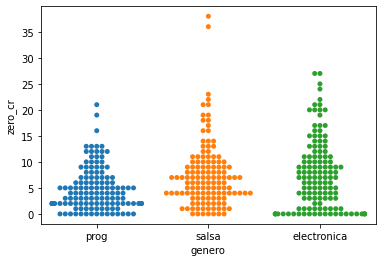

In [60]:
sns.swarmplot(x="genero", y="zero_cr", data=df)

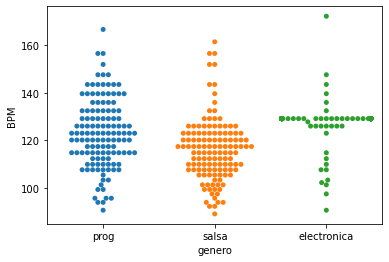

In [61]:
sns.swarmplot(x="genero", y="BPM", data=df)

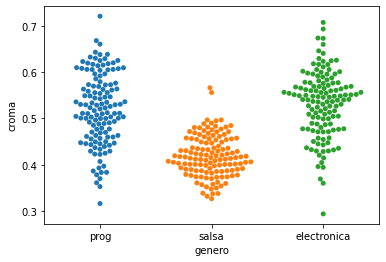

In [62]:
sns.swarmplot(x="genero", y="croma", data=df)

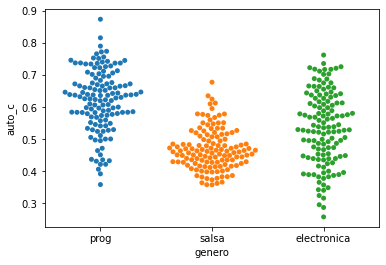

In [63]:
sns.swarmplot(x="genero", y="auto_c", data=df)

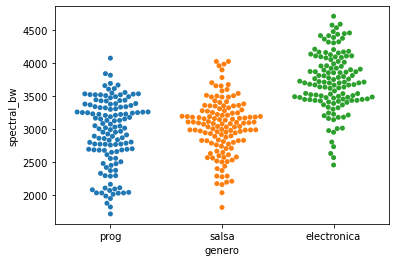

In [64]:
sns.swarmplot(x="genero", y="spectral_bw", data=df)

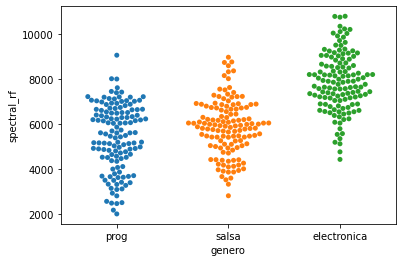

In [65]:
sns.swarmplot(x="genero", y="spectral_rf", data=df)

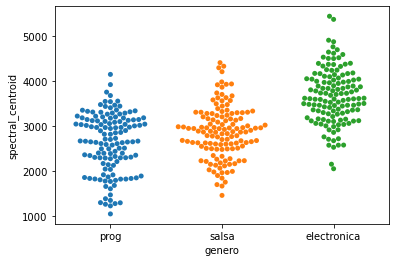

In [66]:
sns.swarmplot(x="genero", y="spectral_centroid", data=df)

In [67]:
df_viz = df[['zero_cr', 'spectral_centroid', 'spectral_bw', 'spectral_rf', 'croma', 'BPM', 'auto_c', 'genero']]

In [68]:
df_viz.head()

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma         BPM  \
0        6        2358.978044  2552.823890  4793.526802  0.470420  123.046875   
1        4        3100.689109  3256.578868  6469.363992  0.596201  109.956782   
2        5        3198.378355  3543.702522  6808.570540  0.546079  143.554688   
3        2        2942.011868  3163.903990  6050.917527  0.433330   90.666118   
4        5        3123.743239  3337.527859  6499.844646  0.535730  120.185320   

     auto_c genero  
0  0.772140   prog  
1  0.628546   prog  
2  0.541958   prog  
3  0.541528   prog  
4  0.746078   prog

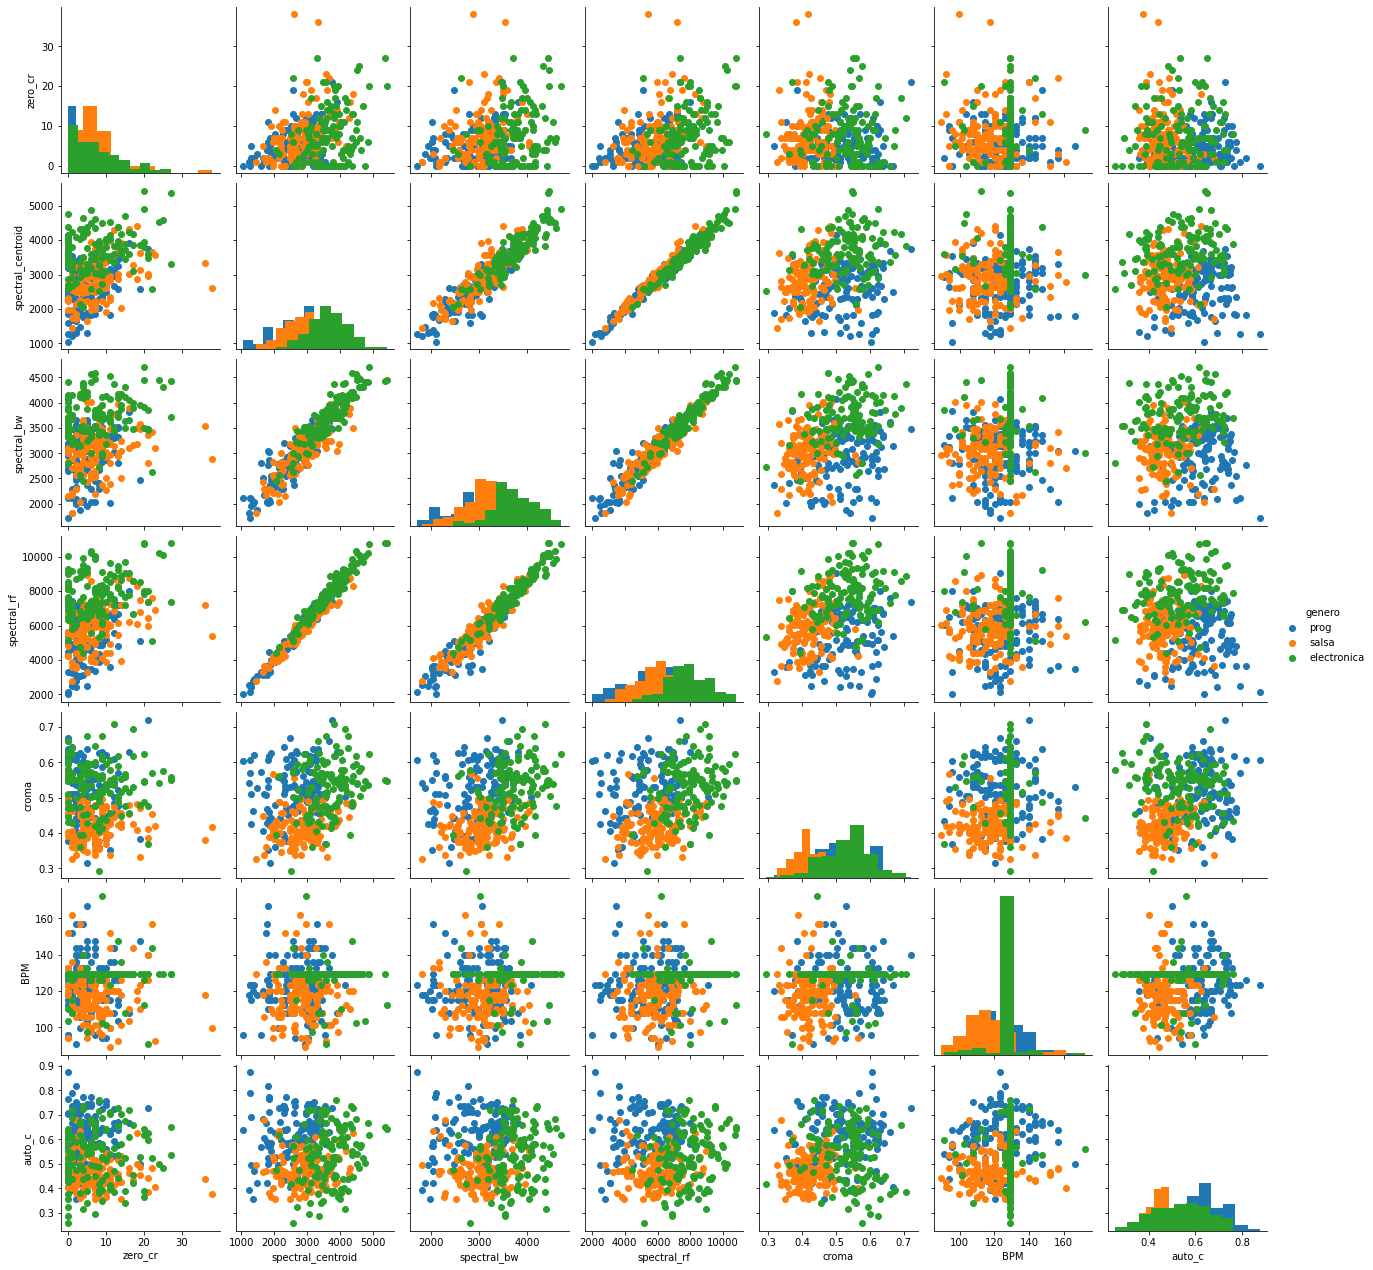

In [69]:
g = sns.PairGrid(df_viz, hue="genero")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

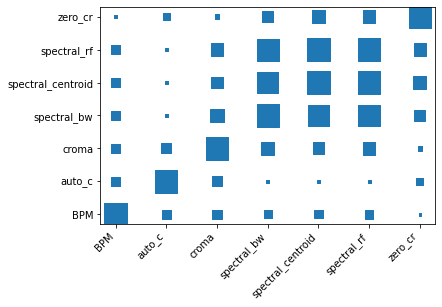

In [70]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num), 
        s=size * size_scale, 
        marker='s' 
    )
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = df
columns = ['zero_cr', 'spectral_centroid', 'spectral_bw', 'spectral_rf', 'croma', 'BPM', 'auto_c'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [71]:
vars_num = 'zero_cr spectral_centroid spectral_bw spectral_rf croma mfcc_1 mfcc_2 mfcc_3 mfcc_4 mfcc_5 mfcc_6 mfcc_7 mfcc_8 mfcc_9 mfcc_10 mfcc_11 mfcc_12 mfcc_13 mfcc_14 mfcc_15 mfcc_16 mfcc_17 mfcc_18 mfcc_19 mfcc_20 BPM auto_c'
vars_num = vars_num.split()

In [72]:
len(vars_num)

27

In [73]:
df_pg = df.groupby('genero').mean()

In [74]:
df_pg

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma  \
genero                                                                         
electronica  7.715385        3664.769823  3719.675979  7857.998810  0.532508   
prog         4.892308        2633.703679  2944.731812  5422.004875  0.520611   
salsa        7.492308        2866.901424  3039.036636  5855.439288  0.419100   

                 mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
genero                                                                 
electronica  -65.689816  116.190062 -37.717804  45.229312 -21.328018   
prog        -121.510305  147.896507 -41.057114  46.850062   0.305706   
salsa       -204.440593  140.781212 -40.942452  49.471140 -11.883951   

                mfcc_6     mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11  \
genero                                                                        
electronica  31.227044 -13.062522  19.865181 -6.606800  11.919786 -2.089726   
prog         26.756867  -6.182665  15.559259 -1.505437   9.135088  0.658689   
salsa        22.663284 -11.767072  11.368040 -3.840248   1.848151 -1.951899   

              mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17  \
genero                                                                    
electronica  6.901863  2.001522  2.897985  3.759977 -0.840888  4.367829   
prog         4.925011  1.455034  1.789769  1.790361 -1.988850 -0.077769   
salsa        3.850634 -0.208070 -2.329010  2.166250 -3.473790  0.526125   

              mfcc_18   mfcc_19   mfcc_20         BPM    auto_c  
genero                                                           
electronica -2.061035  5.707278 -2.616686  127.834031  0.534869  
prog        -2.959955  1.395956 -4.444564  123.038354  0.622049  
salsa       -3.216435  1.328346 -5.358968  116.143151  0.468924

In [75]:
paleta = dict(zip(df_pg.zero_cr.unique(), ["orange","yellow","brown"]))
colores = df_pg.zero_cr.map(paleta)

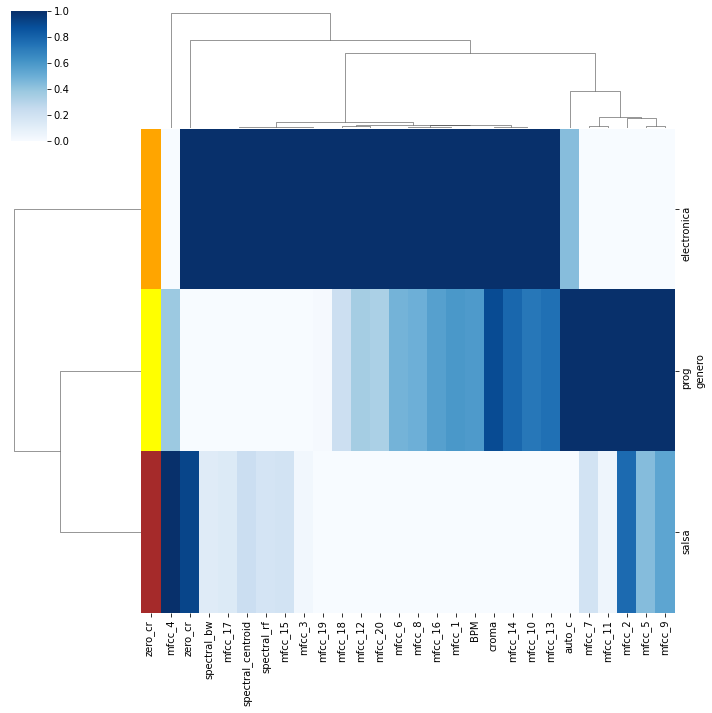

In [76]:
sns.clustermap(df_pg, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=colores)

Con todas estas visualizaciones podemos darnos una idea a priori de las relaciones que hay entre los tres géneros según sus caracterísicas. Sin embargo, esto sigue siendo una aproximación trivial del fenómeno y sigue sujeto a la interpretación humana. A continuación se modelerá para comprobar si la computadora es capaz de reconocer entre géneros dadas las características de la señal de audio que se extrajeron con anterioridad.

In [77]:
del(df_viz) #liberamos memoria

### Modelado

In [272]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS
from sklearn.metrics import confusion_matrix
import pickle

In [79]:
"""
Se crea un data frame auxiliar sin el nombre de los archivos, esto porque más adelante se usará el 
nombre del archivo.
""" 
df_aux = df.drop(['archivo'], axis = 1)

In [80]:
df_aux.head()

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
0        6        2358.978044  2552.823890  4793.526802  0.470420 -163.372833   
1        4        3100.689109  3256.578868  6469.363992  0.596201  -48.062439   
2        5        3198.378355  3543.702522  6808.570540  0.546079  -58.244419   
3        2        2942.011868  3163.903990  6050.917527  0.433330  -91.082634   
4        5        3123.743239  3337.527859  6499.844646  0.535730  -34.448353   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  165.717529 -50.697205  13.083968  -0.032861  16.523687 -10.634155   
1  135.743393 -53.932007  63.562389  -6.626508  33.995968  -5.462245   
2  134.549545 -35.384872  52.873055  -5.400178  27.031818 -12.117587   
3  134.391296 -46.598930  44.523190  -2.545116  30.069979  -9.316360   
4  137.779984 -48.767544  63.001434 -11.798602  31.900543 -13.216450   

      mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13   mfcc_14  \
0  13.878497 -0.156555   4.318977  1.155136  3.123753  3.154028  3.419914   
1  21.089064  0.379193  13.363898 -0.915789  8.659492  1.639240  5.244628   
2  20.233650 -8.962458  10.447237 -4.707659  7.385719 -0.928300  4.593798   
3  17.695271 -0.801928   9.089577 -1.713330  8.924645  4.266488  2.395693   
4  19.975677 -6.714272  13.966826  0.649572  8.866032  1.035663  3.280222   

    mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  1.201207 -3.672799  1.497480  0.186496  0.511725 -5.180268  123.046875   
1  1.330808 -2.682353  0.532447 -1.862646  1.804187 -5.636509  109.956782   
2  1.471745  0.739590  0.728077 -4.671610  3.458641 -1.755218  143.554688   
3  1.147897  1.289821 -0.101062 -4.962541  3.051191 -2.858684   90.666118   
4  3.242964 -4.131340  1.912559 -6.067165  2.728408 -6.114751  120.185320   

     auto_c genero  
0  0.772140   prog  
1  0.628546   prog  
2  0.541958   prog  
3  0.541528   prog  
4  0.746078   prog

In [81]:
def codificar_generos(x):
    if x == 'prog':
        return 0
    elif x == 'salsa':
        return 1
    elif x == 'electronica':
        return 2

In [82]:
df_aux['target'] = df_aux['genero'].map(codificar_generos)

In [83]:
df_aux = df_aux.drop(['genero'], axis = 1)

In [84]:
df_aux

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma  \
0          6        2358.978044  2552.823890  4793.526802  0.470420   
1          4        3100.689109  3256.578868  6469.363992  0.596201   
2          5        3198.378355  3543.702522  6808.570540  0.546079   
3          2        2942.011868  3163.903990  6050.917527  0.433330   
4          5        3123.743239  3337.527859  6499.844646  0.535730   
..       ...                ...          ...          ...       ...   
385        6        2575.123693  3005.389688  5564.092052  0.502320   
386       15        3718.115177  3493.782363  7626.795035  0.567823   
387       19        3864.484272  3947.200355  8519.525400  0.480503   
388        0        3332.281145  3467.253378  7298.074751  0.431944   
389        7        3591.624189  3709.409154  7548.133606  0.477659   

         mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0   -163.372833  165.717529 -50.697205  13.083968  -0.032861  16.523687   
1    -48.062439  135.743393 -53.932007  63.562389  -6.626508  33.995968   
2    -58.244419  134.549545 -35.384872  52.873055  -5.400178  27.031818   
3    -91.082634  134.391296 -46.598930  44.523190  -2.545116  30.069979   
4    -34.448353  137.779984 -48.767544  63.001434 -11.798602  31.900543   
..          ...         ...        ...        ...        ...        ...   
385 -188.561890  145.575531 -41.501461  47.843094 -11.712511  28.348310   
386  -58.652626  105.322052 -53.181622  43.308205 -22.160574  26.726955   
387  -58.399002  118.087608 -31.061525  51.545441 -24.027578  36.409058   
388 -105.453407  114.252968 -18.881662  36.844822 -18.484241  33.493614   
389   -1.158877  123.738770 -36.778862  40.367935 -19.889458  27.192369   

        mfcc_7     mfcc_8     mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13  \
0   -10.634155  13.878497  -0.156555   4.318977  1.155136  3.123753  3.154028   
1    -5.462245  21.089064   0.379193  13.363898 -0.915789  8.659492  1.639240   
2   -12.117587  20.233650  -8.962458  10.447237 -4.707659  7.385719 -0.928300   
3    -9.316360  17.695271  -0.801928   9.089577 -1.713330  8.924645  4.266488   
4   -13.216450  19.975677  -6.714272  13.966826  0.649572  8.866032  1.035663   
..         ...        ...        ...        ...       ...       ...       ...   
385  -7.600820  13.613605   2.732146   2.947855  3.605409  6.848191  2.274838   
386 -12.496088  22.249159  -1.509698   8.357769 -4.032179  5.886038  2.767959   
387 -21.325958  20.040140 -15.393820   9.397675 -6.469026  4.237088 -3.188266   
388  -6.559953  18.577913  -5.552446   9.160286 -7.346992 -3.262074 -8.601421   
389 -11.229925  18.227455  -4.435206  13.120482 -1.195981  6.046183  0.015581   

      mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20  \
0    3.419914  1.201207 -3.672799  1.497480  0.186496  0.511725 -5.180268   
1    5.244628  1.330808 -2.682353  0.532447 -1.862646  1.804187 -5.636509   
2    4.593798  1.471745  0.739590  0.728077 -4.671610  3.458641 -1.755218   
3    2.395693  1.147897  1.289821 -0.101062 -4.962541  3.051191 -2.858684   
4    3.280222  3.242964 -4.131340  1.912559 -6.067165  2.728408 -6.114751   
..        ...       ...       ...       ...       ...       ...       ...   
385 -2.674485  5.352834 -0.206322  3.039914 -2.498269  2.183645 -1.435693   
386  2.678487  2.477016 -1.815939  5.377456 -3.577778  7.179162 -2.833043   
387  0.903239  3.566648 -0.357372  5.836795 -2.829212  2.148330 -6.471159   
388 -8.937236 -4.173946 -4.352620  5.287313 -0.805680  5.677492 -4.592224   
389 -0.324959  0.980846 -4.326663  4.134473 -4.238715  6.130796 -1.494782   

            BPM    auto_c  target  
0    123.046875  0.772140       0  
1    109.956782  0.628546       0  
2    143.554688  0.541958       0  
3     90.666118  0.541528       0  
4    120.185320  0.746078       0  
..          ...       ...     ...  
385  129.199219  0.572574       2  
386  129.199219  0.389928       2  
387  129.199219  0.530109    

In [174]:
# Creamos una variable X que contenga todas las características y una Y que sea el 'target'
X = df_aux[vars_num].copy()
Y = df_aux['target'].copy()

In [552]:
# Escalamos las columnas
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)

In [609]:
#dividimos el data frame 
X_train,X_test,y_train,y_test = train_test_split(Xs,Y, train_size = 0.7)
print(f'Tamaño x_train: {len(X_train)}\nTamaño y_train: {len(y_train)}\nTamaño x_test: {len(X_test)}\nTamaño y_test: {len(y_test)}')
print(f'Porcentajes: \ntrain: {(len(X_train) / 390) * 100}%\ntest: {(len(X_test) / 390) * 100}%' )

Tamaño x_train: 273
Tamaño y_train: 273
Tamaño x_test: 117
Tamaño y_test: 117
Porcentajes: 
train: 70.0%
test: 30.0%


#### K vecinos

In [610]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier()
modelo.fit(X_train, y_train)

KNeighborsClassifier()

In [611]:
print(f'TRAIN: {accuracy_score(y_pred=modelo.predict(X_train),y_true=y_train)}')
print(f'TEST: {accuracy_score(y_pred=modelo.predict(X_test),y_true=y_test)}')

TRAIN: 0.9304029304029304
TEST: 0.8803418803418803


In [612]:
param=dict(n_neighbors = range(3,66),
weights = ['uniform','distance'])

In [613]:
grid = GridSearchCV(param_grid=param,cv=3,n_jobs=-1,estimator=modelo,verbose=True)

In [614]:
%%time
grid.fit(X_test,y_test)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s


Wall time: 884 ms


[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    0.8s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 66),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [615]:
grid.best_score_

0.8803418803418803

In [616]:
grid.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [617]:
modelo=grid.best_estimator_

In [618]:
print(f'TRAIN: {accuracy_score(y_pred=modelo.predict(X_train),y_true=y_train)}')
print(f'TEST: {accuracy_score(y_pred=modelo.predict(X_test),y_true=y_test)}')
print(f'Diferencia: {abs(accuracy_score(y_pred=modelo.predict(X_test),y_true=y_test) - accuracy_score(y_pred=modelo.predict(X_train),y_true=y_train))}')

TRAIN: 0.8534798534798534
TEST: 0.8717948717948718
Diferencia: 0.01831501831501836


In [619]:
print(confusion_matrix(y_true=y_train,y_pred = modelo.predict(X_train)))
print(confusion_matrix(y_true=y_test,y_pred = modelo.predict(X_test)))

[[81 12  1]
 [ 6 79  6]
 [10  5 73]]
[[32  2  2]
 [ 2 35  2]
 [ 5  2 35]]


In [620]:
#comprobación visual
mds_2d = MDS(n_components = 2)

In [621]:
df_2d = pd.DataFrame(mds_2d.fit_transform(Xs), columns = ['d1', 'd2'])

In [622]:
df_2d['genero'] = df['genero']

In [623]:
df_2d[u'^y'] = modelo.predict(Xs)

In [624]:
df_2d.head()

d1        d2 genero  ^y
0 -0.024999 -0.748217   prog   0
1 -0.441609 -0.029050   prog   0
2 -0.242054  0.223148   prog   0
3 -0.126200 -0.159175   prog   0
4 -0.276413  0.224306   prog   0

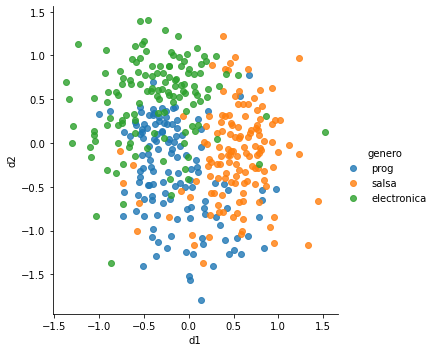

In [625]:
sns.lmplot(data = df_2d, x = 'd1', y = 'd2', hue = 'genero', fit_reg = False)

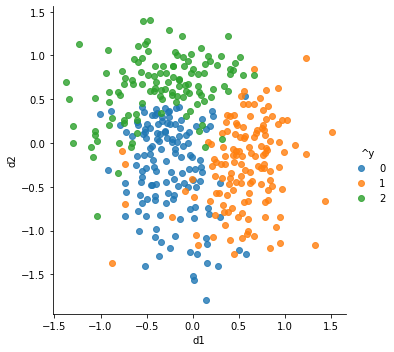

In [626]:
sns.lmplot(data = df_2d, x = 'd1', y = 'd2', hue = '^y', fit_reg = False)

In [629]:
#K vecinos resultó ser un buen modelo, sin embargo los clusters no son tan diferenciables entre sí visualmente.
#Podemos ver en funcionamiento el modelo con un ejemplo práctico

In [630]:
pickle.dump(modelo,open('..\\modelos\\kvecinos.md', 'wb'))

### K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X_a = np.array(Xs[vars_num])
y_a = np.array(Y)

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_a).score(X_a) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [246]:
modelo = KMeans(n_clusters = 3)
modelo.fit(X_a)

KMeans(n_clusters=3)

In [247]:
print(modelo.cluster_centers_)

[[0.20366133 0.4381966  0.47426655 0.46732985 0.29190754 0.44383934
  0.43283828 0.38461877 0.60359433 0.33669157 0.4601895  0.39332833
  0.50212071 0.38065411 0.47283041 0.3735738  0.44338669 0.41430106
  0.27331591 0.48278617 0.35518483 0.52769348 0.35094099 0.46372318
  0.31621955 0.33063051 0.35370066]
 [0.19488304 0.58273592 0.6521071  0.64550133 0.57242541 0.79214185
  0.30103564 0.37899477 0.5987403  0.27733406 0.57843138 0.38505168
  0.70238235 0.34584679 0.72473162 0.3958395  0.57026935 0.50905354
  0.444739   0.57087319 0.48264131 0.6694749  0.41934196 0.65292096
  0.42577557 0.44542189 0.51303049]
 [0.10803324 0.244761   0.27660654 0.26001487 0.45638997 0.42749398
  0.61270761 0.44016869 0.45232723 0.55776599 0.39690187 0.65007695
  0.45340564 0.54110695 0.49464572 0.5078465  0.41904534 0.52912119
  0.3551262  0.48197091 0.45079396 0.4848828  0.49047197 0.4269302
  0.41783142 0.39645563 0.49259076]]


In [248]:
closest, _ = pairwise_distances_argmin_min(modelo.cluster_centers_, X_a)
closest

array([225, 327,  47], dtype=int64)

In [249]:
cancion = df['archivo'].values

In [250]:
for row in closest:
    print(cancion[row])

HAGAMOSLOQUEDIGAELCORAZON-GRUPONICHE_01m_00s__02m_00s.mp3
GoHard_01m_00s__02m_00s.mp3
04RagdollPhysics_02m_00s__03m_00s.mp3


In [251]:
#Siendo estas las canciones más representativas según el modelo

In [252]:
mds_3d = MDS(n_components = 3)
df_3d = pd.DataFrame(mds_3d.fit_transform(Xs), columns = ['d1', 'd2', 'd3'])
df_3d['target'] = df_aux['target']

In [253]:
df_3d.head()

d1        d2        d3  target
0  0.064179 -0.596616  0.519748       0
1 -0.079048  0.188392  0.496291       0
2 -0.031809  0.331187  0.133856       0
3 -0.274487 -0.025930  0.090873       0
4  0.320841  0.241771  0.424865       0

In [254]:
X_a = np.array(df_3d[['d1', 'd2', 'd3']])
Y_a = np.array(df_aux['target'])
X_a.shape

(390, 3)

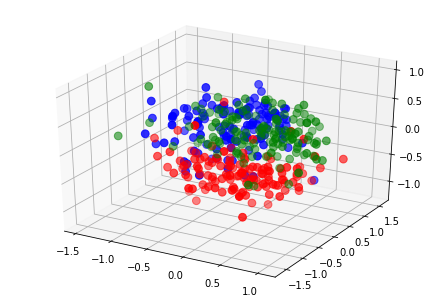

In [268]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green'] #Azul = prog, Rojo = salsa y Verde = electrónica
asignar=[]
for row in Y_a:
    asignar.append(colores[row])
ax.scatter(X_a[:, 0], X_a[:, 1], X_a[:, 2], c=asignar,s=60)
#Se debe verificar si con k-means se pueden pintar clusters diferenciados

In [269]:
kmeans = KMeans(n_clusters=3).fit(X_a)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.27043956 -0.24923336 -0.37772291]
 [-0.32502443 -0.59982536  0.21611974]
 [ 0.01780598  0.53907941  0.12203272]]


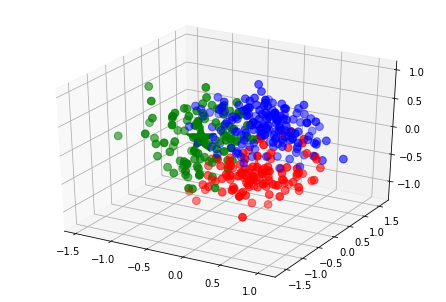

In [270]:
labels = kmeans.predict(X_a)
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_a[:, 0], X_a[:, 1], X_a[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [271]:
lista_canciones =  pd.DataFrame()
lista_canciones['archivo']=df['archivo'].values
lista_canciones['genero']=df['genero'].values
lista_canciones['label'] = labels;
lista_canciones

archivo       genero  label
0                  01-TheMountain_02m_00s__03m_00s.mp3         prog      1
1          01ANightmareToRemember_02m_00s__03m_00s.mp3         prog      2
2                      01AcidRain_02m_00s__03m_00s.mp3         prog      2
3                  01BalrogBoogie_02m_00s__03m_00s.mp3         prog      1
4                    01C'estlaVie_02m_00s__03m_00s.mp3         prog      2
..                                                 ...          ...    ...
385             WhenLoveTakesOver_01m_00s__02m_00s.mp3  electronica      1
386  WhenTheFunkDrops(OriginalMix)_01m_00s__02m_00s...  electronica      2
387                     Wintermix_01m_00s__02m_00s.mp3  electronica      2
388                           Yee_01m_00s__02m_00s.mp3  electronica      0
389                     YouMakeMe_01m_00s__02m_00s.mp3  electronica      2

[390 rows x 3 columns]

In [267]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=lista_canciones.groupby('label').size()
cantidadGrupo

color  cantidad
0    red       170
1  green       116
2   blue       104

Como se puede ver, KMeans no resulta ser el mejor modelo para clusterizar la música

### Red Neuronal

In [685]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score

In [693]:
param=dict(hidden_layer_sizes = [(x,y,z,) for x in range(5,50,5) for y in range(5,50,5) for z in range(5,50,5)],
           activation = ['identity', 'logistic', 'tanh', 'relu'],
           max_iterations = 100000,
learning_rate = ['constant', 'invscaling', 'adaptive'])

In [694]:
modelo = MLPClassifier()

In [695]:
%%time
grid.fit(X_train,y_train)

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 3488 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4788 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6288 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7988 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9888 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 11988 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 14288 tasks      | elapsed:  5.5min


KeyboardInterrupt: 

In [690]:
def metricas(modelo,Xt,Xv,yt,yv):
    print('roc:\n')
    print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
    print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))
    print('accuracy:\n')
    print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
    print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))